In [ ]:
# unnormalized data gives higher classification accuracy
# Upon normalization, there is a sudden drop in error but it is persistently high afterwards

# Oscillations are lesser when not normalized.

Iterations needed =  1000
[-0.25329437 -0.14121692 -0.18292588 -0.03608772  0.24137154]


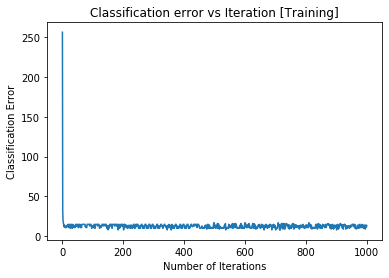

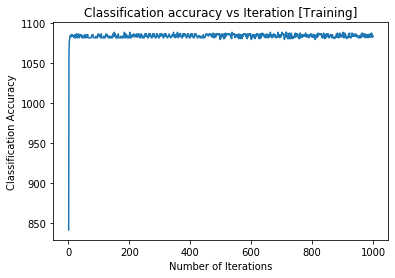

Classification accuracy =  271  out of TEST_SIZE =  275
True +ve :  115
True -ve :  156
False +ve :  4
False -ve :  0


In [3]:
import matplotlib.pyplot as plt
import sys
import numpy as np

FEATURES = 4
TRAIN_SIZE = 1097
TEST_SIZE = 1372 - 1097

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(data, Y, alpha, N):
    global FEATURES, TRAIN_SIZE
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < TRAIN_SIZE and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data[:TRAIN_SIZE]:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(TRAIN_SIZE - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile():
        n = 0
        trn = open("Dataset_Question2.csv", "r")
        lines = trn.readlines()
        data, Y = [], []
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = []
            for val in temp:
                xx.append(float(val))
            xx[-1] = 1 # bias term!
            y = (int(2 * float(temp[-1]) - 1))
            Y.append(y)
            data.append(xx)
        trn.close()
        return data, Y, n


def plotError(wT, error, okay, data, Y, itr):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Classification Accuracy")
        plt.show()


def main():
        data, Y, n = readFile()
        wT, error, okay, itr = perceptron(data, Y, 0.001, 1000)
        # TRAINED NOW !
        print(wT)
        plotError(wT, error, okay, data, Y, itr)

        idx = TRAIN_SIZE
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data[TRAIN_SIZE:]:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro > 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro < 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro < 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of TEST_SIZE = ", TEST_SIZE)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()


Iterations needed =  1000
[-5.07515207e-03 -1.61912584e-05 -1.47754082e-03  3.65800629e-03
  2.61480350e-01]


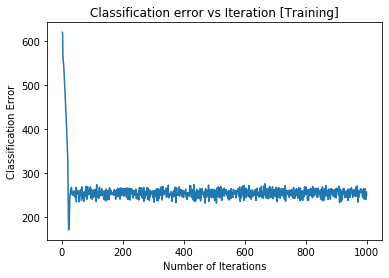

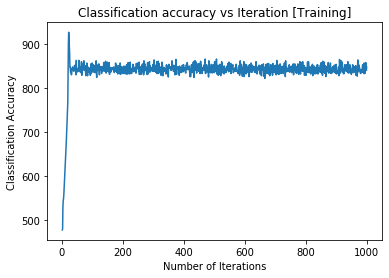

Classification accuracy =  219  out of TEST_SIZE =  275
True +ve :  61
True -ve :  158
False +ve :  2
False -ve :  54


In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

from sklearn.preprocessing import MinMaxScaler

FEATURES = 4
TRAIN_SIZE = 1097
TEST_SIZE = 1372 - 1097

def add(a, b, mul):
    i = 0
    for val in b:
        a[i] += (val * mul)
        i = i + 1
    return a

def perceptron(data, Y, alpha, N):
    global FEATURES, TRAIN_SIZE
    wT = np.random.random(FEATURES + 1)
    error, okay = [], []
    correct, itr = 0, 0
    while (correct < TRAIN_SIZE and itr < N):
        correct = 0
        itr += 1
        idx = 0
        for x in data[:TRAIN_SIZE]:
            dotPro = np.dot(wT, x)
            if (dotPro > 0 and Y[idx] < 0):
                wT = add(wT, x, -1*alpha)
            elif (dotPro < 0 and Y[idx] > 0):
                wT = add(wT, x, alpha)
            else:
                correct += 1
            idx += 1
        error.append(TRAIN_SIZE - correct)
        okay.append(correct)
    print("Iterations needed = ", itr)
    return wT, error, okay, itr


def readFile():
        n = 0
        trn = open("Dataset_Question2.csv", "r")
        lines = trn.readlines()
        data, Y = [], []
        for words in lines:
            n = n + 1
            temp = words.split(",")
            xx = []
            for val in temp:
                xx.append(float(val))
            xx[-1] = 1 # bias term!
            y = (int(2 * float(temp[-1]) - 1))
            Y.append(y)
            data.append(xx)
        trn.close()
        min_max_scaler = MinMaxScaler()
        data = min_max_scaler.fit_transform(data)
        return data, Y, n


def plotError(wT, error, okay, data, Y, itr):
        global FEATURES
        xx = np.linspace(1, itr, itr)
        plt.plot(xx, error)
        plt.title("Classification error vs Iteration [Training]")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Classification Error")
        plt.show()

        plt.plot(xx, okay)
        plt.title("Classification accuracy vs Iteration [Training]")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Classification Accuracy")
        plt.show()


def main():
        data, Y, n = readFile()
        wT, error, okay, itr = perceptron(data, Y, 0.001, 1000)
        # TRAINED NOW !
        print(wT)
        plotError(wT, error, okay, data, Y, itr)

        idx = TRAIN_SIZE
        truePos, trueNeg, falsePos, falseNeg = 0, 0, 0, 0
        for x in data[TRAIN_SIZE:]:
            dotPro = 0.0
            # print(type(wT), type(x))
            for p in range(FEATURES + 1):
                dotPro += (wT[p] * x[p])
            if ((dotPro > 0) and (Y[idx] > 0)):    # true +ve
                truePos += 1
            elif ((dotPro < 0) and (Y[idx] < 0)): # true -ve
                trueNeg += 1
            elif ((dotPro < 0) and (Y[idx] > 0)): # is pos, but classified -ve
                falseNeg += 1
            else:
                falsePos += 1
            idx += 1
        classAcc = (truePos + trueNeg)
        print("Classification accuracy = ", classAcc, " out of TEST_SIZE = ", TEST_SIZE)
        print("True +ve : ", truePos)
        print("True -ve : ", trueNeg)
        print("False +ve : ", falsePos)
        print("False -ve : ", falseNeg)

if __name__ == "__main__":
    main()
